In [33]:
import skfmm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

In [34]:
v0 = 2.  # Velocity at the origin of the model
vergrad = 0.5  # Vertical gradient
horgrad = 0.  # Horizontal gradient

zmin = 0.; zmax = 2.; deltaz = 0.02
xmin = 0.; xmax = 2.; deltax = 0.02

# Point-source location
sz = 1.0; sx = 1.0

In [35]:
z = np.arange(zmin, zmax + deltaz, deltaz)
nz = z.size

x = np.arange(xmin, xmax + deltax, deltax)
nx = x.size

Z, X = np.meshgrid(z, x, indexing='ij')

In [36]:
# Create signed distance function 
phi = np.ones((nz, nx)) * 1000

# Iterate through phi array and calculate distances
for i in range(nz):
  for j in range(nx):
    distance = np.sqrt((z[i] - z[50])**2 + (x[j] - x[50])**2)
    phi[j, i] = distance

# # Iterate through phi array and calculate Manhattan distances
# for i in range(nz):
#   for j in range(nx):
#     distance = np.abs(i - 50) + np.abs(j - 50)
#     phi[j, i] = distance

# Set source point distance to zero
phi[50, 50] = 0

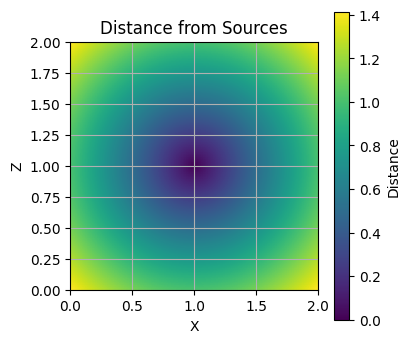

In [37]:

plt.figure(figsize=(4, 4))
plt.imshow(phi, cmap='viridis', extent=[xmin, xmax, zmin, zmax])
plt.colorbar(label='Distance')
plt.title('Distance from Sources')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

In [38]:
# Define velocity model with two layers
speed = np.ones((nz, nx)) * 5 # Initialize velocity model array

# Set velocity inside the square box to 3
speed[0:50, :] = 3

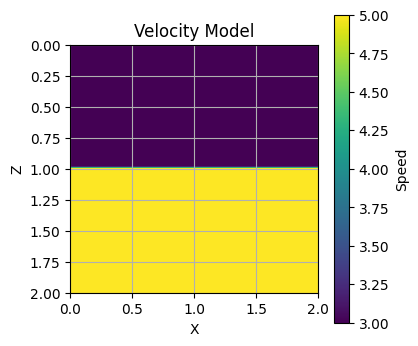

In [39]:
plt.figure(figsize=(4, 4))
plt.imshow(speed, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
plt.colorbar(label='Speed')
plt.title('Velocity Model')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

In [40]:
t    = skfmm.travel_time(phi, speed, dx=0.0001)

In [41]:
np.save('../experiences/fsm_output/2layers.npy', t)